## Mean stress correction methods

Studies have shown that the mean stress effect plays a critical role in fatigue damage accumulation. The mean value of the fatigue stress response varies under different mean stress levels. In general, fatigue damage increases with the superimposition of static stress to the applied cyclic stress. The mean stress correction is to transform the stress cycle to an equivalent stress cycle with zero mean stress. 

For a stress range $[\sigma_{lower}, \sigma_{upper}]$, the mean stress $\sigma_{mean}$ is calculated with 

$$ \sigma_{m} = \frac{\sigma_{lower} + \sigma_{upper}}{2} $$

and the alternating stress, also refered to as  stress amplitude, $\sigma_a$ is calculated with

$$ \sigma_{a} = \frac{\sigma_{upper} - \sigma_{lower}}{2} $$

Reference:

* https://sachinchaturvedi.files.wordpress.com/2012/03/fatigue.pdf.
* https://en.wikipedia.org/wiki/Goodman_relation

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Goodman correction method

Function `goodmanCorrection` implements the Goodman correction method.

The Goodman diagram, originally proposed in 1890, is a graphical representation of this effect. The Goodman correction could be expressed as

<!-- The alternating stress is plotted on one axis and the mean stress on the other. The allowable alternating stress with no mean stress is the fatigue limit. The maximum mean stress, with zero alternating stress, is the ultimate strength. A straight line is then drawn between the two points. Any combination of mean and alternating stress on this line will have the same fatigue life. Mathematically this may be expressed as: -->

$$
\frac{\sigma_a}{\sigma_{FL}} + \frac{\sigma_{m}}{\sigma_{u}} = 1 
$$

where $\sigma_{u}$ is the ultimate strength; $\sigma_{mean}$ is the mean stress of the stress range; $\sigma_a$ is the alternating stress; $\sigma_{FL}$ is the fatigue limit. 

If a safty factor $n$ is considered, the equation becomes

$$
\frac{\sigma_a}{\sigma_{FL}} + \frac{\sigma_{m}}{\sigma_{u}} = \frac{1}{n} 
$$

#### Function help

In [2]:
from ffpack.lcc import goodmanCorrection

help( goodmanCorrection )

Help on function goodmanCorrection in module ffpack.lcc.meanStressCorrection:

goodmanCorrection(stressRange, ultimateStrength, n=1.0)
    The Goodman correction in this implementation is applicable to cases with stress 
    ratio no less than -1.
    
    Parameters
    ----------
    stressRange: 1d array
        Stress range, e.g., [ lowerStress, upperStress ].
    ultimateStrength: scalar
        Ultimate tensile strength.
    n: scalar, optional
        Safety factor, default to 1.0.
    
    Returns
    -------
    rst: scalar
        Fatigue limit.
    
    Raises
    ------
    ValueError
        If the stressRange dimension is not 1, or stressRange length is not 2.
        If stressRange[ 1 ] <= 0 or stressRange[ 0 ] >= stressRange[ 1 ].
        If ultimateStrength is not a scalar or ultimateStrength <= 0.
        If ultimateStrength is smaller than the mean stress.
        If n < 1.0.
    
    Examples
    --------
    >>> from ffpack.lcc import goodmanCorrection
    >>> stre

#### Example with default values

In [3]:
stressRangeData = [ 1.0, 2.0 ]
ultimateStrength = 4.0

goodmanResult = goodmanCorrection( stressRangeData, ultimateStrength )

In [4]:
print( goodmanResult )

0.8


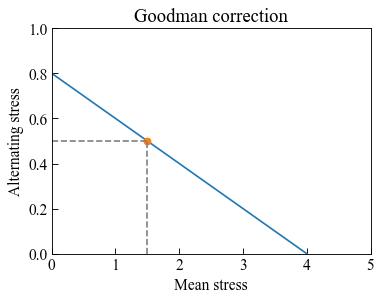

In [5]:
fig, ax = plt.subplots()

x = [0, ultimateStrength]
y = [goodmanResult, 0]
ax.plot( x, y, "-" )
ax.tick_params( axis='x', direction="in", length=5 )
ax.tick_params( axis='y', direction="in", length=5 )
plt.xlim( left=0, right=5 )
plt.ylim( bottom=0, top=1 )

sigmaMean = np.mean(stressRangeData)
sigmaAlt = (stressRangeData[1] - stressRangeData[0]) / 2
point = ( sigmaMean, sigmaAlt )
ax.plot( point[0], point[1], "o" )
ax.axvline( point[0], ymin=0, ymax=point[1]/1, linestyle='--', color='gray') # plot vertical line
ax.axhline( point[1], xmin=0, xmax=point[0]/5, linestyle='--', color='gray') # plot horizontal line

ax.set_xlabel( "Mean stress" )
ax.set_ylabel( "Alternating stress" )
ax.set_title( "Goodman correction" )

plt.tight_layout()
plt.show()

### Soderberg correction method

Function `soderbergCorrection` implements the Goodman correction method.

The Soderberg diagram, originally proposed in 1890, is a graphical representation of this effect. The Goodman correction could be expressed as

$$
\frac{\sigma_a}{\sigma_{FL}} + \frac{\sigma_{m}}{\sigma_{y}} = 1 
$$

where $\sigma_{y}$ is the yield strength; $\sigma_{mean}$ is the mean stress of the stress range; $\sigma_a$ is the alternating stress; $\sigma_{FL}$ is the fatigue limit. 

If a safty factor $n$ is considered, the equation becomes

$$
\frac{\sigma_a}{\sigma_{FL}} + \frac{\sigma_{m}}{\sigma_{y}} = \frac{1}{n} 
$$

#### Function help

In [6]:
from ffpack.lcc import soderbergCorrection

help( soderbergCorrection )

Help on function soderbergCorrection in module ffpack.lcc.meanStressCorrection:

soderbergCorrection(stressRange, yieldStrength, n=1.0)
    The Soderberg correction in this implementation is applicable to cases with stress 
    ratio no less than -1.
    
    Parameters
    ----------
    stressRange: 1d array
        Stress range, e.g., [ lowerStress, upperStress ].
    yieldStrength: scalar
        Yield strength.
    n: scalar, optional
        Safety factor, default to 1.0.
    
    Returns
    -------
    rst: scalar
        Fatigue limit.
    
    Raises
    ------
    ValueError
        If the stressRange dimension is not 1, or stressRange length is not 2.
        If stressRange[ 1 ] <= 0 or stressRange[ 0 ] >= stressRange[ 1 ].
        If yieldStrength is not a scalar or yieldStrength <= 0.
        If yieldStrength is smaller than the mean stress.
        If safety factor n < 1.0.
    
    Examples
    --------
    >>> from ffpack.lcc import soderbergCorrection
    >>> stressRa

#### Example with default values

In [7]:
stressRangeData = [ 1.0, 2.0 ]
yieldStrength = 3.0

soderbergResult = soderbergCorrection( stressRangeData, yieldStrength )

In [8]:
print( soderbergResult )

1.0


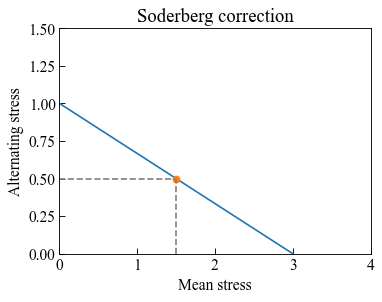

In [9]:
fig, ax = plt.subplots()

x = [0, yieldStrength]
y = [soderbergResult, 0]
ax.plot( x, y, "-" )
ax.tick_params( axis='x', direction="in", length=5 )
ax.tick_params( axis='y', direction="in", length=5 )
plt.xlim( left=0, right=4 )
plt.ylim( bottom=0, top=1.5 )

sigmaMean = np.mean(stressRangeData)
sigmaAlt = (stressRangeData[1] - stressRangeData[0]) / 2
point = ( sigmaMean, sigmaAlt )
ax.plot( point[0], point[1], "o" )
ax.axvline( point[0], ymin=0, ymax=point[1]/1.5, linestyle='--', color='gray') # plot vertical line
ax.axhline( point[1], xmin=0, xmax=point[0]/4, linestyle='--', color='gray') # plot horizontal line

ax.set_xlabel( "Mean stress" )
ax.set_ylabel( "Alternating stress" )
ax.set_title( "Soderberg correction" )

plt.tight_layout()
plt.show()

### Gerber correction method

Function `gerberCorrection` implements the Goodman correction method.

The Goodman diagram, originally proposed in 1890, is a graphical representation of this effect. The Goodman correction could be expressed as

$$
\frac{\sigma_a}{\sigma_{FL}} + \left( \frac{\sigma_{m}}{\sigma_{u}} \right)^{2} = 1 
$$

where $\sigma_{u}$ is the ultimate strength; $\sigma_{mean}$ is the mean stress of the stress range; $\sigma_a$ is the alternating stress; $\sigma_{FL}$ is the fatigue limit. 

If a safty factor $n$ is considered, the equation becomes

$$
\frac{n\sigma_a}{\sigma_{FL}} + \left( \frac{n\sigma_{m}}{\sigma_{u}} \right)^{2} = 1 
$$

#### Function help

In [10]:
from ffpack.lcc import gerberCorrection

help( gerberCorrection )

Help on function gerberCorrection in module ffpack.lcc.meanStressCorrection:

gerberCorrection(stressRange, ultimateStrength, n=1.0)
    The Gerber correction in this implementation is applicable to cases with stress 
    ratio no less than -1.
    
    Parameters
    ----------
    stressRange: 1d array
        Stress range, e.g., [ lowerStress, upperStress ].
    ultimateStrength: scalar
        Ultimate strength.
    n: scalar, optional
        Safety factor, default to 1.0.
    
    Returns
    -------
    rst: scalar
        Fatigue limit.
    
    Raises
    ------
    ValueError
        If the stressRange dimension is not 1, or stressRange length is not 2.
        If stressRange[ 1 ] <= 0 or stressRange[ 0 ] >= stressRange[ 1 ].
        If ultimateStrength is not a scalar or ultimateStrength <= 0.
        If ultimateStrength is smaller than the mean stress.
        If safety factor n < 1.0.
    
    Examples
    --------
    >>> from ffpack.lcc import gerberCorrection
    >>> st

#### Example with default values

In [11]:
stressRangeData = [ 1.0, 2.0 ]
ultimateStrength = 4.0

gerberResult = gerberCorrection( stressRangeData, ultimateStrength )

In [12]:
print( gerberResult )

0.5818181818181818


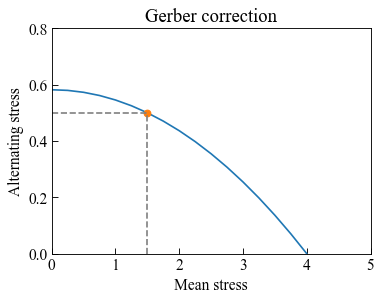

In [13]:
fig, ax = plt.subplots()

x = np.arange(0, ultimateStrength + 0.25, 0.25)

sigmaMean = np.mean(stressRangeData)
sigmaAlt = (stressRangeData[1] - stressRangeData[0]) / 2
def calculateSigmaAlt(mean): 
    rst = 1 - (mean / ultimateStrength) ** 2
    return rst * gerberResult

y = [calculateSigmaAlt(mean) for mean in x]
ax.plot( x, y, "-" )

ax.tick_params( axis='x', direction="in", length=5 )
ax.tick_params( axis='y', direction="in", length=5 )
plt.xlim( left=0, right=5 )
plt.ylim( bottom=0, top=0.8 )

point = ( sigmaMean, sigmaAlt )
ax.plot( point[0], point[1], "o" )
ax.axvline( point[0], ymin=0, ymax=point[1]/0.8, linestyle='--', color='gray') # plot vertical line
ax.axhline( point[1], xmin=0, xmax=point[0]/5, linestyle='--', color='gray') # plot horizontal line

ax.set_xlabel( "Mean stress" )
ax.set_ylabel( "Alternating stress" )
ax.set_title( "Gerber correction" )

plt.tight_layout()
plt.show()

### Comparison of the correction methods

In [14]:
sigmaFL = 0.8            # assumed fatigue limit
yieldStrength = 3.0      # assumed yield strength
ultimateStrength = 4.0   # assumed ultimate strength

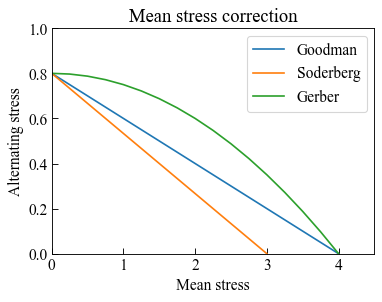

In [15]:
fig, ax = plt.subplots()

xYield = np.arange(0, yieldStrength + 0.25, 0.25)
xUltimate = np.arange(0, ultimateStrength + 0.25, 0.25)

def calcGoodman(mean):
    rst = 1 - mean / ultimateStrength
    return rst * sigmaFL

def calcSoderberg(mean):
    rst = 1 - mean / yieldStrength
    return rst * sigmaFL

def calcGerber(mean): 
    rst = 1 - (mean / ultimateStrength) ** 2
    return rst * sigmaFL

yGoodman = [calcGoodman(mean) for mean in xUltimate]
ySoderberg = [calcSoderberg(mean) for mean in xYield]
yGerber = [calcGerber(mean) for mean in xUltimate]
ax.plot( xUltimate, yGoodman, "-", label='Goodman' )
ax.plot( xYield, ySoderberg, "-", label='Soderberg' )
ax.plot( xUltimate, yGerber, "-", label='Gerber' )
plt.legend()

ax.tick_params( axis='x', direction="in", length=5 )
ax.tick_params( axis='y', direction="in", length=5 )
plt.xlim( left=0, right=4.5 )
plt.ylim( bottom=0, top=1 )

ax.set_xlabel( "Mean stress" )
ax.set_ylabel( "Alternating stress" )
ax.set_title( "Mean stress correction" )

plt.tight_layout()
plt.show()